# Objectives

## 1. Introduction to data reshaping 
- wide format: 
  - each feature is in a separate columns
  - each row contains many features of the same player
  - no repeated value but nulls 
- long format: preferred format 
   - each row represents a feature
   - multiple rows for each player 
   - repeated values 
- **transposing** a dataframe: long to wide
- **pivot method**: long to wide 
   - application 
       - demonstrate relationship between two columns
       - time series operations wiht the variables
       - operations that required columns to be the unique value
   - handle non-numeric value
   - ***Duplicates error!!!*** Index/column must be pair-unique values!! 
- **pivot table method**
   - will automatically pick unique values
   - can have multi-index
   - summary statistics: margins = True
- From a wide to long format
  - **.melt()** method
  - **.wide_to_long()** method
- Splitting or concatenating string columns
- Multi-level Index
- Use **.stack()** and **.unstack()** method
- Handle generated missing data
- Combine reshaping and grouping processes
- List-like column transformation
- Nested data in columns (JSON)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
players = pd.read_csv('/QXJ/Python/Datacamp/Importing and cleaning data with Python/players_20.csv')
players.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [4]:
players.columns.to_list()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [4]:
# transpose 
players.set_index('club')[['short_name','nationality']].transpose()

club,FC Barcelona,Juventus,Paris Saint-Germain,Atlético Madrid,Real Madrid,Manchester City,FC Barcelona,Liverpool,Real Madrid,Liverpool,...,Finn Harps,Dalian YiFang FC,Carlisle United,Derry City,Waterford FC,Beijing Renhe FC,Shanghai SIPG FC,Hebei China Fortune FC,Shanghai Greenland Shenhua FC,Hebei China Fortune FC
short_name,L. Messi,Cristiano Ronaldo,Neymar Jr,J. Oblak,E. Hazard,K. De Bruyne,M. ter Stegen,V. van Dijk,L. Modrić,M. Salah,...,M. Gallagher,Huang Jiahui,M. Sagaf,E. Tweed,P. Martin,Shao Shuai,Xiao Mingjie,Zhang Wei,Wang Haijian,Pan Ximing
nationality,Argentina,Portugal,Brazil,Slovenia,Belgium,Belgium,Germany,Netherlands,Croatia,Egypt,...,Republic of Ireland,China PR,England,Republic of Ireland,Republic of Ireland,China PR,China PR,China PR,China PR,China PR


In [3]:
fifa = players[['short_name','weight_kg', 'height_cm','shooting']]
fifa.shape

(18278, 4)

In [4]:
fifa.reset_index()

,index,short_name,weight_kg,height_cm,shooting
0,0,L. Messi,72,170,92.0
1,1,Cristiano Ronaldo,83,187,93.0
2,2,Neymar Jr,68,175,85.0
3,3,J. Oblak,87,188,NaN
4,4,E. Hazard,74,175,83.0
...,...,...,...,...,...
18273,18273,Shao Shuai,79,186,23.0
18274,18274,Xiao Mingjie,66,177,24.0
18275,18275,Zhang Wei,75,186,35.0
18276,18276,Wang Haijian,74,185,35.0


fifa.drop_duplicates()
fifa.shape
fifa.head()

In [5]:
fifa = fifa.iloc[:5,:]
fifa

,short_name,weight_kg,height_cm,shooting
0,L. Messi,72,170,92.0
1,Cristiano Ronaldo,83,187,93.0
2,Neymar Jr,68,175,85.0
3,J. Oblak,87,188,NaN
4,E. Hazard,74,175,83.0


In [38]:
fifa.pivot(index='short_name', columns = 'shooting', values=['weight_kg','height_cm'])

weight_kg                         height_cm                \
shooting                NaN  83.0  85.0  92.0  93.0       NaN   83.0   85.0   
short_name                                                                    
Cristiano Ronaldo       NaN   NaN   NaN   NaN  83.0       NaN    NaN    NaN   
E. Hazard               NaN  74.0   NaN   NaN   NaN       NaN  175.0    NaN   
J. Oblak               87.0   NaN   NaN   NaN   NaN     188.0    NaN    NaN   
L. Messi                NaN   NaN   NaN  72.0   NaN       NaN    NaN    NaN   
Neymar Jr               NaN   NaN  68.0   NaN   NaN       NaN    NaN  175.0   

                                 
shooting            92.0   93.0  
short_name                       
Cristiano Ronaldo    NaN  187.0  
E. Hazard            NaN    NaN  
J. Oblak             NaN    NaN  
L. Messi           170.0    NaN  
Neymar Jr            NaN    NaN

In [7]:
fifa.pivot_table(index = 'short_name', columns='weight_kg', values = 'shooting', aggfunc = 'mean')

weight_kg,68,72,74,83
short_name,,,,
Cristiano Ronaldo,NaN,NaN,NaN,93.0
E. Hazard,NaN,NaN,83.0,NaN
L. Messi,NaN,92.0,NaN,NaN
Neymar Jr,85.0,NaN,NaN,NaN


In [14]:
fifa.pivot_table(index = ['weight_kg','height_cm'], columns = 'short_name',
                 values = 'shooting', aggfunc = 'mean', margins = True, fill_value = 0)

,short_name,Cristiano Ronaldo,E. Hazard,L. Messi,Neymar Jr,All
weight_kg,height_cm,,,,,
68,175,0,0,0,85,85.00
72,170,0,0,92,0,92.00
74,175,0,83,0,0,83.00
83,187,93,0,0,0,93.00
All,,93,83,92,85,88.25


## 2. Converting Between Wide and Long Format
- Reshaping with melt
  - perform analytics
  - plot different variables in the same graph
- wide to long function
  - **pd.wide_to_long()**
    > 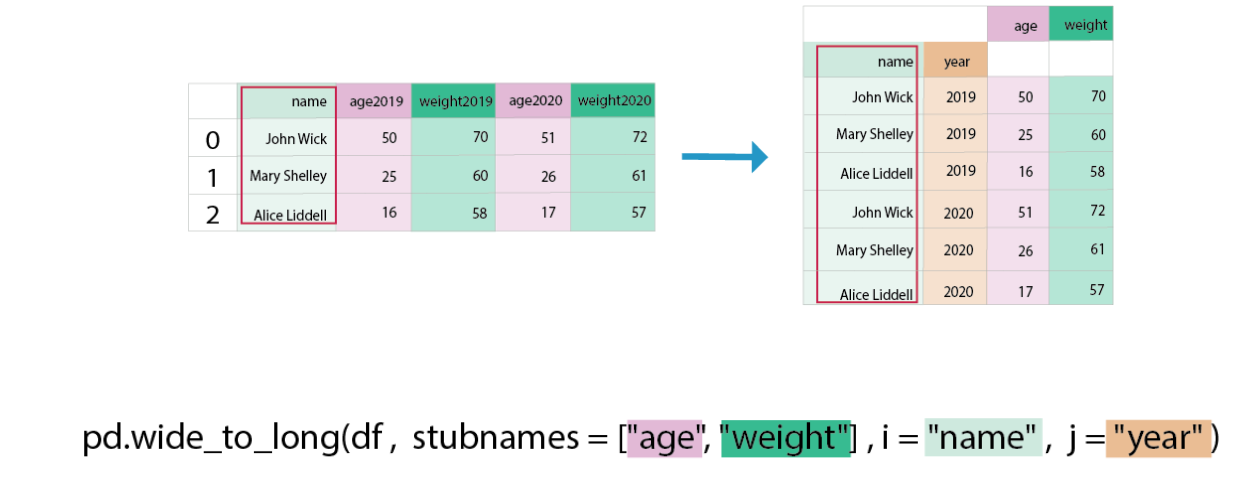
- Working with string column
  - str.split().get()
  - str.cat()

In [6]:
import pandas as pd
books = pd.read_csv('/QXJ/Python/Datacamp/Importing and cleaning data with Python/books.csv')
books.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-04,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-03,Scholastic,NaN


In [8]:
books_sub = books[['title','isbn','language_code','average_rating']]
books_sub.head(3)

,title,isbn,language_code,average_rating
0,Harry Potter and the Half-Blood Prince (Harry ...,439785960,eng,4.57
1,Harry Potter and the Order of the Phoenix (Har...,439358078,eng,4.49
2,Harry Potter and the Chamber of Secrets (Harry...,439554896,eng,4.42


**wide to long function - melt()**

In [12]:
books_melt1 = books_sub.melt(id_vars = ['title'])
books_melt1

,title,variable,value
0,Harry Potter and the Half-Blood Prince (Harry ...,isbn,439785960
1,Harry Potter and the Order of the Phoenix (Har...,isbn,439358078
2,Harry Potter and the Chamber of Secrets (Harry...,isbn,439554896
3,Harry Potter and the Prisoner of Azkaban (Harr...,isbn,043965548X
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,isbn,439682584
...,...,...,...
33376,Expelled from Eden: A William T. Vollmann Reader,average_rating,4.06
33377,You Bright and Risen Angels,average_rating,4.08
33378,The Ice-Shirt (Seven Dreams #1),average_rating,3.96
33379,Poor People,average_rating,3.72


In [13]:
print(books.shape)
print(books_melt1.shape)
print(books_melt2.shape)

(11127, 13)
(33381, 3)


In [15]:
books_melt2 = books_sub.melt(id_vars = ['title'], 
                             value_vars = ['language_code','average_rating'],
                            var_name = 'feature',
                            value_name = 'language and rating')
books_melt2

,title,feature,language and rating
0,Harry Potter and the Half-Blood Prince (Harry ...,language_code,eng
1,Harry Potter and the Order of the Phoenix (Har...,language_code,eng
2,Harry Potter and the Chamber of Secrets (Harry...,language_code,eng
3,Harry Potter and the Prisoner of Azkaban (Harr...,language_code,eng
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,language_code,eng
...,...,...,...
22249,Expelled from Eden: A William T. Vollmann Reader,average_rating,4.06
22250,You Bright and Risen Angels,average_rating,4.08
22251,The Ice-Shirt (Seven Dreams #1),average_rating,3.96
22252,Poor People,average_rating,3.72


**wide to long function - pd.wide_to_long()**
- assume the index is numeric: i = 'year'
- if not, need argument: suffix = '\w+'

In [29]:
df = pd.DataFrame({
    'title': ['Mostly Harmless: 1', 'The Hitchhikers Guide', 'Poor People'],
    'ratings2019': [4.2, 4.8, 4.5],
    'sold2019':[456, 890, 678],
    'ratings2020':[4.3,4.9,4.6],
    'sold2020': [436, 999, 645]
})

df

,title,ratings2019,sold2019,ratings2020,sold2020
0,Mostly Harmless: 1,4.2,456,4.3,436
1,The Hitchhikers Guide,4.8,890,4.9,999
2,Poor People,4.5,678,4.6,645


In [30]:
pd.wide_to_long(df, 
                stubnames = ['ratings','sold'],
               i= 'title',
               j= 'year')

,,ratings,sold
title,year,,
Mostly Harmless: 1,2019,4.2,456
The Hitchhikers Guide,2019,4.8,890
Poor People,2019,4.5,678
Mostly Harmless: 1,2020,4.3,436
The Hitchhikers Guide,2020,4.9,999
Poor People,2020,4.6,645


In [12]:
df2 = pd.DataFrame({
    'title': ['Mostly Harmless', 'The Hitchhikers Guide', 'Poor People'],
    'author':['Harper Lee', 'Douglas Adams', 'Edgar Alan Poe'],
    'ratings2019': [4.2, 4.8, 4.5],
    'sold2019':[456, 890, 678],
    'ratings2020':[4.3,4.9,4.6],
    'sold2020': [436, 999, 645]
})

df2

,title,author,ratings2019,sold2019,ratings2020,sold2020
0,Mostly Harmless,Harper Lee,4.2,456,4.3,436
1,The Hitchhikers Guide,Douglas Adams,4.8,890,4.9,999
2,Poor People,Edgar Alan Poe,4.5,678,4.6,645


In [14]:
pd.wide_to_long(df2,
               stubnames = ['ratings', 'sold'],
               i = ['author', 'title'],
               j = 'year')

ratings  sold
author         title                 year               
Harper Lee     Mostly Harmless       2019      4.2   456
                                     2020      4.3   436
Douglas Adams  The Hitchhikers Guide 2019      4.8   890
                                     2020      4.9   999
Edgar Alan Poe Poor People           2019      4.5   678
                                     2020      4.6   645

In [20]:
df3 = pd.DataFrame({
    'title': ['Mostly Harmless', 'The Hitchhikers Guide', 'Poor People'],
    'author':['Harper Lee', 'Douglas Adams', 'Edgar Alan Poe'],
    'ratings_2019': [4.2, 4.8, 4.5],
    'sold_2019':[456, 890, 678],
    'ratings_2020':[4.3,4.9,4.6],
    'sold_2020': [436, 999, 645]
})

df3

,title,author,ratings_2019,sold_2019,ratings_2020,sold_2020
0,Mostly Harmless,Harper Lee,4.2,456,4.3,436
1,The Hitchhikers Guide,Douglas Adams,4.8,890,4.9,999
2,Poor People,Edgar Alan Poe,4.5,678,4.6,645


In [22]:
pd.wide_to_long(df3, 
               stubnames = ['ratings', 'sold'],
               i = ['author', 'title'],
               j = 'year',
               sep ='_')

ratings  sold
author         title                 year               
Harper Lee     Mostly Harmless       2019      4.2   456
                                     2020      4.3   436
Douglas Adams  The Hitchhikers Guide 2019      4.8   890
                                     2020      4.9   999
Edgar Alan Poe Poor People           2019      4.5   678
                                     2020      4.6   645

In [26]:
df4 = pd.DataFrame({
    'title': ['Mostly Harmless', 'The Hitchhikers Guide', 'Poor People'],
    'author':['Harper Lee', 'Douglas Adams', 'Edgar Alan Poe'],
    'ratings_edition1': [4.2, 4.8, 4.5],
    'sold_edition2':[456, 890, 678],
    'ratings_edition1':[4.3,4.9,4.6],
    'sold_edition2': [436, 999, 645]
})

df4

,title,author,ratings_edition1,sold_edition2
0,Mostly Harmless,Harper Lee,4.3,436
1,The Hitchhikers Guide,Douglas Adams,4.9,999
2,Poor People,Edgar Alan Poe,4.6,645


In [27]:
pd.wide_to_long(df4, 
               stubnames = ['ratings', 'sold'],
               i = ['author', 'title'],
               j = 'edition',
               sep ='_',
               suffix = '\w+')

ratings   sold
author         title                 edition                 
Harper Lee     Mostly Harmless       edition1      4.3    NaN
                                     edition2      NaN  436.0
Douglas Adams  The Hitchhikers Guide edition1      4.9    NaN
                                     edition2      NaN  999.0
Edgar Alan Poe Poor People           edition1      4.6    NaN
                                     edition2      NaN  645.0

**Working with string columns**

In [103]:
df5 = pd.DataFrame({
    'title': ['Mostly Harmless: vol I', 'Mostly Harmless: vol II', 'Mostly Harmless: vol III'],
    'ratings2019': [4.2, 4.8, 4.5],
    'sold2019':[456, 890, 678],
    'ratings2020':[4.3,4.9,4.6],
    'sold2020': [436, 999, 645]
})

df5

,title,ratings2019,sold2019,ratings2020,sold2020
0,Mostly Harmless: vol I,4.2,456,4.3,436
1,Mostly Harmless: vol II,4.8,890,4.9,999
2,Mostly Harmless: vol III,4.5,678,4.6,645


In [104]:
df5['title'].dtypes

dtype('O')

In [105]:
df5['title'].str.split(':')

0      [Mostly Harmless,  vol I]
1     [Mostly Harmless,  vol II]
2    [Mostly Harmless,  vol III]
Name: title, dtype: object

In [106]:
df5['title'].str.split(':').str.get(0)

0    Mostly Harmless
1    Mostly Harmless
2    Mostly Harmless
Name: title, dtype: object

In [107]:
df5['title'].str.split(':', expand = True)

,0,1
0,Mostly Harmless,vol I
1,Mostly Harmless,vol II
2,Mostly Harmless,vol III


In [108]:
df5[['main_title','subtitle']] = df5['title'].str.split(':', expand = True)
df5

,title,ratings2019,sold2019,ratings2020,sold2020,main_title,subtitle
0,Mostly Harmless: vol I,4.2,456,4.3,436,Mostly Harmless,vol I
1,Mostly Harmless: vol II,4.8,890,4.9,999,Mostly Harmless,vol II
2,Mostly Harmless: vol III,4.5,678,4.6,645,Mostly Harmless,vol III


In [109]:
# transform df5 
df5 = df5.drop('title', axis = 1)
pd.wide_to_long(df5, stubnames = ['ratings','sold'],
               i = ['main_title','subtitle'],
               j = 'year')

ratings  sold
main_title      subtitle year               
Mostly Harmless  vol I   2019      4.2   456
                         2020      4.3   436
                 vol II  2019      4.8   890
                         2020      4.9   999
                 vol III 2019      4.5   678
                         2020      4.6   645

**Concatenate two columns**

In [49]:
df6 = pd.DataFrame({
    'name_author': ['Virginia', 'Margaret', 'Harper'],
    'lastname_author': ['Wolf', 'Atwood', 'Lee'],
    'nationality':['British', 'Canadian', 'American'],
    'num_books':[50,40,2],
})

df6

,name_author,lastname_author,nationality,num_books
0,Virginia,Wolf,British,50
1,Margaret,Atwood,Canadian,40
2,Harper,Lee,American,2


In [52]:
df6['author'] = df6['name_author'].str.cat(df6['lastname_author'], sep = ' ')
df6

,name_author,lastname_author,nationality,num_books,author
0,Virginia,Wolf,British,50,Virginia Wolf
1,Margaret,Atwood,Canadian,40,Margaret Atwood
2,Harper,Lee,American,2,Harper Lee


In [57]:
df7 = df6.melt(id_vars ='author',
        value_vars = ['nationality','num_books'],
        var_name = 'features',
        value_name = 'values')
df7

,author,features,values
0,Virginia Wolf,nationality,British
1,Margaret Atwood,nationality,Canadian
2,Harper Lee,nationality,American
3,Virginia Wolf,num_books,50
4,Margaret Atwood,num_books,40
5,Harper Lee,num_books,2


In [58]:
df7 = df7.set_index('author')
df7

,features,values
author,,
Virginia Wolf,nationality,British
Margaret Atwood,nationality,Canadian
Harper Lee,nationality,American
Virginia Wolf,num_books,50
Margaret Atwood,num_books,40
Harper Lee,num_books,2


In [60]:
df7.index = df7.index.str.split(' ', expand = True)
df7
# get multi-level index

,,features,values
Virginia,Wolf,nationality,British
Margaret,Atwood,nationality,Canadian
Harper,Lee,nationality,American
Virginia,Wolf,num_books,50
Margaret,Atwood,num_books,40
Harper,Lee,num_books,2


In [67]:
name = ['Virginia', 'Margaret', 'Harper']
name = pd.DataFrame(name)
name.columns = ['name']
name

,name
0,Virginia
1,Margaret
2,Harper


In [72]:
firstname = ['Wolf', 'Atwood', 'Lee']
name['author'] = name['name'].str.cat(firstname, sep = ' ')
name

,name,author
0,Virginia,Virginia Wolf
1,Margaret,Margaret Atwood
2,Harper,Harper Lee


# 3. Stacking and Unstacking DataFrames
- Multi-level index
- The **.stack(level = 0)** method
  > 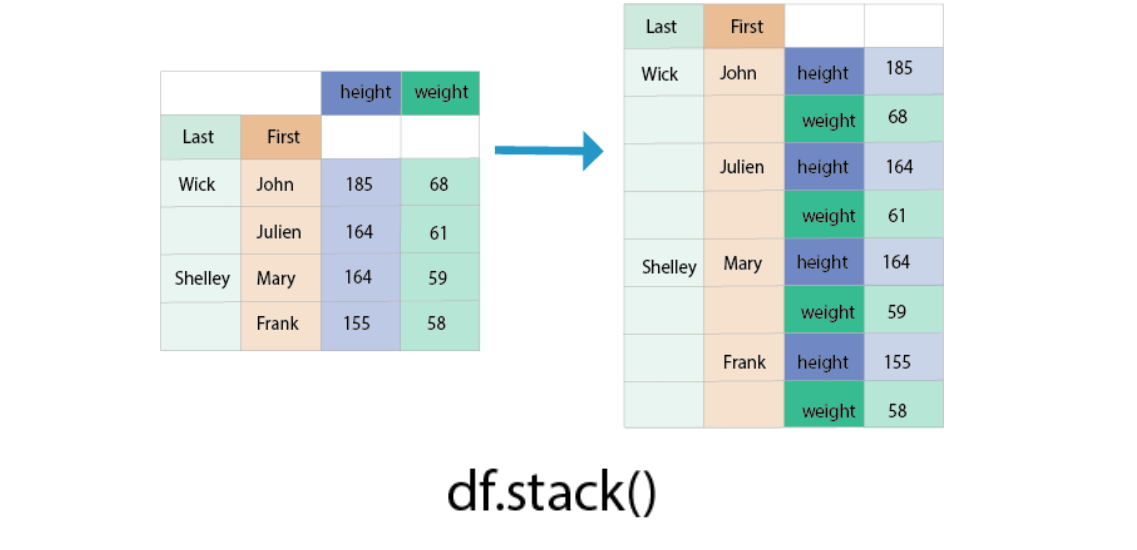
- The **.unstack(level = 0)** method
  > 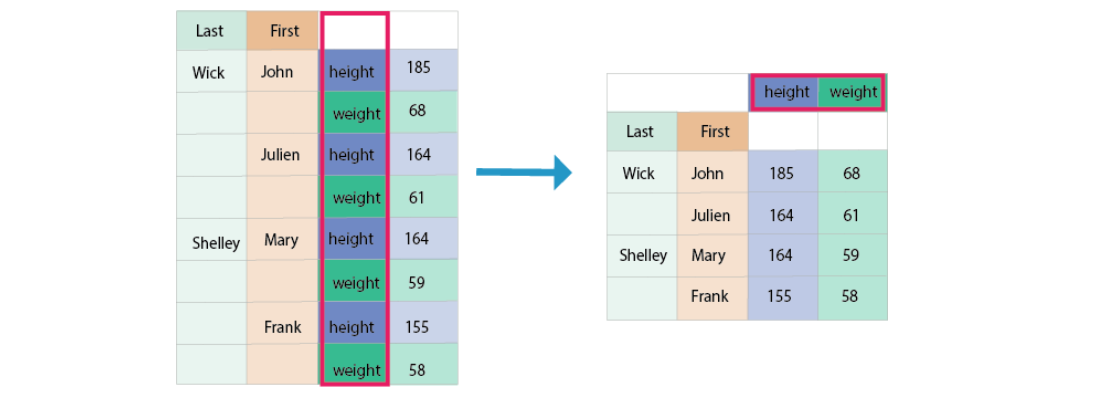
- Stack or unstack multi-level
- Swap levels using **.swaplevel(0,1)**
- Handling missing data: 
  - .unstack argument**fill_name=""** -> missing values caused by stack and unstack
  - .stack has the argument **dropna = True** by default -> missing value caused by original DataFrame
  - .stack(dropna = False).**fillna(0)**

In [88]:
df7 = df7.drop('index', axis = 1)
df7.columns = ['Firstname', 'Lastname','Features','Values']
df7

,Firstname,Lastname,Features,Values
0,Virginia,Wolf,nationality,British
1,Margaret,Atwood,nationality,Canadian
2,Harper,Lee,nationality,American
3,Virginia,Wolf,num_books,50
4,Margaret,Atwood,num_books,40
5,Harper,Lee,num_books,2


In [89]:
# setting multi-level index - Method I
df7.set_index(['Firstname','Lastname'], inplace = True)

In [90]:
df7

,,Features,Values
Firstname,Lastname,,
Virginia,Wolf,nationality,British
Margaret,Atwood,nationality,Canadian
Harper,Lee,nationality,American
Virginia,Wolf,num_books,50
Margaret,Atwood,num_books,40
Harper,Lee,num_books,2


In [91]:
df6

,name_author,lastname_author,nationality,num_books,author
0,Virginia,Wolf,British,50,Virginia Wolf
1,Margaret,Atwood,Canadian,40,Margaret Atwood
2,Harper,Lee,American,2,Harper Lee


In [93]:
# setting multi-level index - Method II
new_array = [['Win','Not_win','Not_win'] , ['F','F','M']]
df6.index = pd.MultiIndex.from_arrays(new_array, 
                                     names = ['Win or not', 'Gender'])
df6

name_author lastname_author nationality  num_books  \
Win or not Gender                                                      
Win        F         Virginia            Wolf     British         50   
Not_win    F         Margaret          Atwood    Canadian         40   
           M           Harper             Lee    American          2   

                            author  
Win or not Gender                   
Win        F         Virginia Wolf  
Not_win    F       Margaret Atwood  
           M            Harper Lee

In [138]:
df5

ratings2019  sold2019  ratings2020  sold2020
main_title      subtitle                                              
Mostly Harmless  vol I            4.2       456          4.3       436
                 vol II           4.8       890          4.9       999
                 vol III          4.5       678          4.6       645

In [134]:
arrays = [['2019','2019','2020','2020'],
          ['ratings','sold','ratings','sold']]
# sepcify multi-levle index on the both rows and columns 
columns = pd.MultiIndex.from_arrays(arrays,
                                    names = ['year','features'])

df5_new = pd.DataFrame(df5, columns = columns)
df5_new

year                        2019         2020     
features                 ratings sold ratings sold
main_title      subtitle                          
Mostly Harmless  vol I       NaN  NaN     NaN  NaN
                 vol II      NaN  NaN     NaN  NaN
                 vol III     NaN  NaN     NaN  NaN

**The .stack() method**
> Rearrange a level of the columns to obtain a reshaped DataFrame with a new inner-most level row index
  > 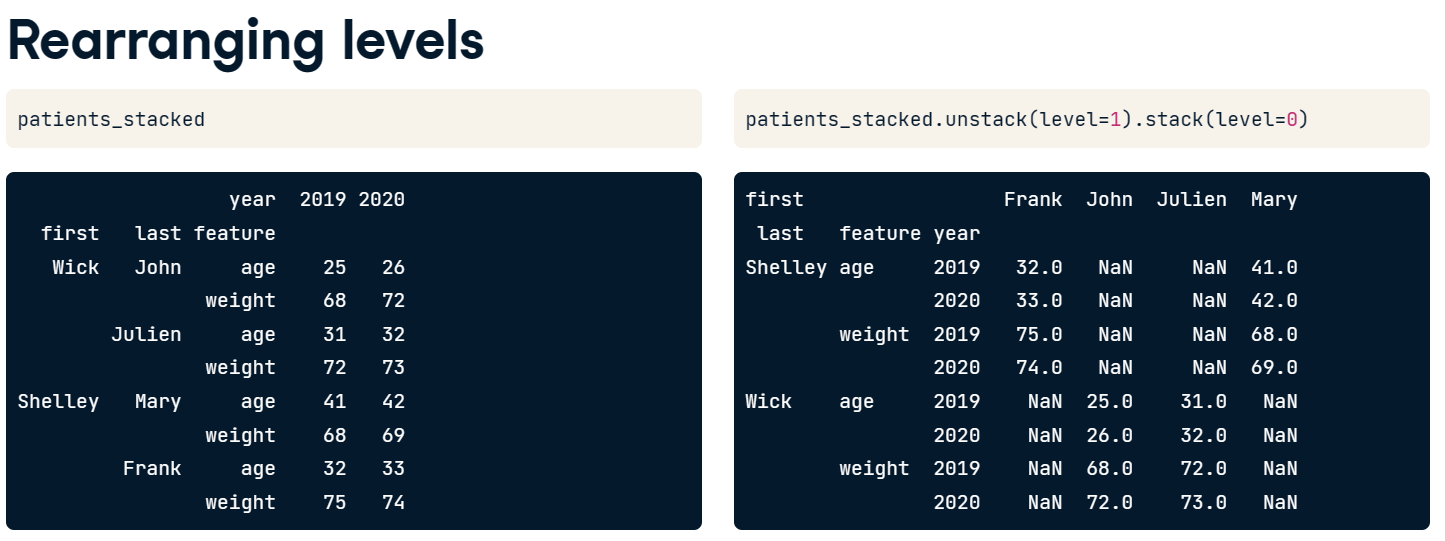

In [111]:
df5

ratings2019  sold2019  ratings2020  sold2020
main_title      subtitle                                              
Mostly Harmless  vol I            4.2       456          4.3       436
                 vol II           4.8       890          4.9       999
                 vol III          4.5       678          4.6       645

In [143]:
df5_stack = df5.stack()
df5_stack_df = pd.DataFrame(df5_stack)
df5_stack_df

0
main_title      subtitle                   
Mostly Harmless  vol I   ratings2019    4.2
                         sold2019     456.0
                         ratings2020    4.3
                         sold2020     436.0
                 vol II  ratings2019    4.8
                         sold2019     890.0
                         ratings2020    4.9
                         sold2020     999.0
                 vol III ratings2019    4.5
                         sold2019     678.0
                         ratings2020    4.6
                         sold2020     645.0

In [117]:
df5_stack = df5_new.stack(level = 0)
df5_stack

,,features,ratings,sold
main_title,subtitle,year,,


In [118]:
df5_stack = df5_new.stack(level = 'year')
df5_stack

,,features,ratings,sold
main_title,subtitle,year,,


**Unstack DataFrame**: Rearrange a level of the row index into the columns to obtain a reshaped DataFrame with a new inner-most column index

In [122]:
df5.unstack(level = 1)

ratings2019                  sold2019                   \
subtitle              vol I  vol II  vol III    vol I  vol II  vol III   
main_title                                                               
Mostly Harmless         4.2     4.8      4.5      456     890      678   

                ratings2020                  sold2020                   
subtitle              vol I  vol II  vol III    vol I  vol II  vol III  
main_title                                                              
Mostly Harmless         4.3     4.9      4.6      436     999      645

In [146]:
df5_stack_df.index

MultiIndex([('Mostly Harmless',   ' vol I', 'ratings2019'),
            ('Mostly Harmless',   ' vol I',    'sold2019'),
            ('Mostly Harmless',   ' vol I', 'ratings2020'),
            ('Mostly Harmless',   ' vol I',    'sold2020'),
            ('Mostly Harmless',  ' vol II', 'ratings2019'),
            ('Mostly Harmless',  ' vol II',    'sold2019'),
            ('Mostly Harmless',  ' vol II', 'ratings2020'),
            ('Mostly Harmless',  ' vol II',    'sold2020'),
            ('Mostly Harmless', ' vol III', 'ratings2019'),
            ('Mostly Harmless', ' vol III',    'sold2019'),
            ('Mostly Harmless', ' vol III', 'ratings2020'),
            ('Mostly Harmless', ' vol III',    'sold2020')],
           names=['main_title', 'subtitle', None])

In [147]:
df5_stack_df.unstack(level = None)

0                              
                         ratings2019 sold2019 ratings2020 sold2020
main_title      subtitle                                          
Mostly Harmless  vol I           4.2    456.0         4.3    436.0
                 vol II          4.8    890.0         4.9    999.0
                 vol III         4.5    678.0         4.6    645.0

**Working with multiple levels**
- Swap levels:df.swaplevel(0,2)
- Stack and unstack multiple levels at the same time

In [148]:
df5

ratings2019  sold2019  ratings2020  sold2020
main_title      subtitle                                              
Mostly Harmless  vol I            4.2       456          4.3       436
                 vol II           4.8       890          4.9       999
                 vol III          4.5       678          4.6       645

In [149]:
df5.swaplevel(0,1)

,,ratings2019,sold2019,ratings2020,sold2020
subtitle,main_title,,,,
vol I,Mostly Harmless,4.2,456,4.3,436
vol II,Mostly Harmless,4.8,890,4.9,999
vol III,Mostly Harmless,4.5,678,4.6,645


In [150]:
df5.swaplevel(0,1).unstack()

,ratings2019,sold2019,ratings2020,sold2020
main_title,Mostly Harmless,Mostly Harmless,Mostly Harmless,Mostly Harmless
subtitle,,,,
vol I,4.2,456,4.3,436
vol II,4.8,890,4.9,999
vol III,4.5,678,4.6,645


In [154]:
df5.unstack().swaplevel(0,1, axis = 1)

subtitle,vol I,vol II,vol III,vol I,vol II,vol III,vol I,vol II,vol III,vol I,vol II,vol III
,ratings2019,ratings2019,ratings2019,sold2019,sold2019,sold2019,ratings2020,ratings2020,ratings2020,sold2020,sold2020,sold2020
main_title,,,,,,,,,,,,
Mostly Harmless,4.2,4.8,4.5,456,890,678,4.3,4.9,4.6,436,999,645


In [155]:
df5.unstack().swaplevel(0,1, axis = 1).stack()

subtitle                      vol I   vol II   vol III
main_title                                            
Mostly Harmless ratings2019     4.2      4.8       4.5
                ratings2020     4.3      4.9       4.6
                sold2019      456.0    890.0     678.0
                sold2020      436.0    999.0     645.0

## 4. Advanced Reshaping
- Reshaping and combining data
  - Statistical functions: sum(), mean(), median(), diff()
  - Transforming list-like columns: **.explode()**
    > 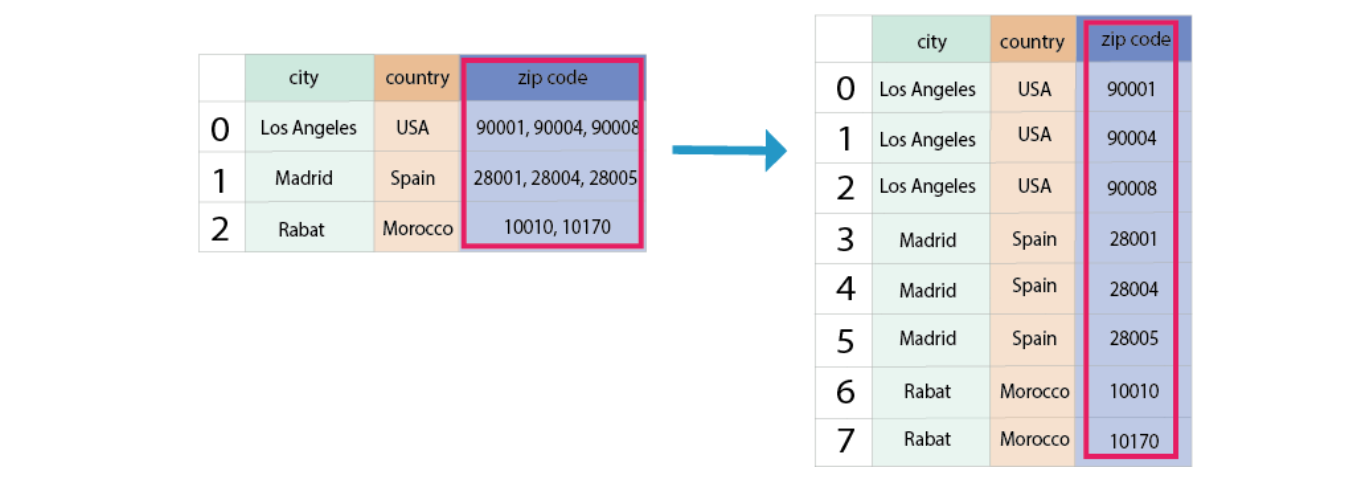

In [176]:
sales = pd.DataFrame({
    'country': ['Italy', 'Italy','Spain','Spain'],
    'shop':['office supply', 'Technology','office supply', 'Technology'],
    'online2017':[310, 510, 229,300],
    'onsite2017':[123,340,200,240],
    'online2018':[110,300,120,290],
    'onsite2018':[100,120,220,210]
})

sales

,country,shop,online2017,onsite2017,online2018,onsite2018
0,Italy,office supply,310,123,110,100
1,Italy,Technology,510,340,300,120
2,Spain,office supply,229,200,120,220
3,Spain,Technology,300,240,290,210


In [177]:
sales = pd.wide_to_long(sales,
                       stubnames = ['online','onsite'],
                       i = ['country','shop'],
                       j = 'year')

sales

online  onsite
country shop          year                
Italy   office supply 2017     310     123
                      2018     110     100
        Technology    2017     510     340
                      2018     300     120
Spain   office supply 2017     229     200
                      2018     120     220
        Technology    2017     300     240
                      2018     290     210

In [178]:
sales = sales.unstack(level = 'shop')
sales

online                   onsite              
shop         Technology office supply Technology office supply
country year                                                  
Italy   2017        510           310        340           123
        2018        300           110        120           100
Spain   2017        300           229        240           200
        2018        290           120        210           220

In [179]:
sales = sales.swaplevel(0, 1,axis = 1)
sales

shop         Technology office supply Technology office supply
                 online        online     onsite        onsite
country year                                                  
Italy   2017        510           310        340           123
        2018        300           110        120           100
Spain   2017        300           229        240           200
        2018        290           120        210           220

In [180]:
sales.to_csv('/QXJ/Python/Datacamp/Importing and cleaning data with Python/sales.csv')

In [181]:
sales['Technology']['online']

country  year
Italy    2017    510
         2018    300
Spain    2017    300
         2018    290
Name: online, dtype: int64

In [182]:
sales.stack().sum(axis = 1)

country  year        
Italy    2017  online    820
               onsite    463
         2018  online    410
               onsite    220
Spain    2017  online    529
               onsite    440
         2018  online    410
               onsite    430
dtype: int64

In [183]:
sales.stack().sum(axis = 1).unstack()

online  onsite
country year                
Italy   2017     820     463
        2018     410     220
Spain   2017     529     440
        2018     410     430

In [184]:
sales.unstack(level = 0).mean(axis = 1)

year
2017    281.50
2018    183.75
dtype: float64

In [187]:
sales['office supply'].unstack(level = 'country')\
.diff(axis = 1, periods = 2)

online       onsite      
country  Italy Spain  Italy Spain
year                             
2017       NaN   NaN   -187   -29
2018       NaN   NaN    -10   100

In [188]:
sales.stack()

shop                 Technology  office supply
country year                                  
Italy   2017 online         510            310
             onsite         340            123
        2018 online         300            110
             onsite         120            100
Spain   2017 online         300            229
             onsite         240            200
        2018 online         290            120
             onsite         210            220

In [191]:
sales.stack().groupby(level ='country').sum()

shop,Technology,office supply
country,,
Italy,1270,643
Spain,1040,769


In [192]:
sales.groupby(level = 'year').median()

shop,Technology,office supply,Technology,office supply
,online,online,onsite,onsite
year,,,,
2017,405.0,269.5,290.0,161.5
2018,295.0,115.0,165.0,160.0


In [194]:
sales.groupby(level = 'year').median()\
.stack(level = [0,1]).unstack(level = 'year')

year                   2017   2018
shop                              
Technology    online  405.0  295.0
              onsite  290.0  165.0
office supply online  269.5  115.0
              onsite  161.5  160.0

**Transforming a list-like column**

In [197]:
cities = pd.DataFrame({
    'city': ['Los Angeles', 'Madrid','Rabat'],
    'country':['USA', 'Spain','Morocco'],
    'zip_code':[[90001,90004,90008], [28001,28004,28005], [22009,10010]],
})

cities

,city,country,zip_code
0,Los Angeles,USA,"[90001, 90004, 90008]"
1,Madrid,Spain,"[28001, 28004, 28005]"
2,Rabat,Morocco,"[22009, 10010]"


In [198]:
cities_explode = cities['zip_code'].explode()
cities_explode

0    90001
0    90004
0    90008
1    28001
1    28004
1    28005
2    22009
2    10010
Name: zip_code, dtype: object

In [199]:
cities[['city','country']].merge(cities_explode,
                                left_index = True, 
                                right_index = True)

,city,country,zip_code
0,Los Angeles,USA,90001
0,Los Angeles,USA,90004
0,Los Angeles,USA,90008
1,Madrid,Spain,28001
1,Madrid,Spain,28004
1,Madrid,Spain,28005
2,Rabat,Morocco,22009
2,Rabat,Morocco,10010


In [200]:
cities_explode = cities.explode('zip_code')
cities_explode

,city,country,zip_code
0,Los Angeles,USA,90001
0,Los Angeles,USA,90004
0,Los Angeles,USA,90008
1,Madrid,Spain,28001
1,Madrid,Spain,28004
1,Madrid,Spain,28005
2,Rabat,Morocco,22009
2,Rabat,Morocco,10010


In [201]:
cities_explode.reset_index(drop = True, inplace = True)

In [202]:
cities_explode

,city,country,zip_code
0,Los Angeles,USA,90001
1,Los Angeles,USA,90004
2,Los Angeles,USA,90008
3,Madrid,Spain,28001
4,Madrid,Spain,28004
5,Madrid,Spain,28005
6,Rabat,Morocco,22009
7,Rabat,Morocco,10010


In [212]:
new_cities = pd.DataFrame({
    'city': ['Los Angeles', 'Madrid','Rabat'],
    'country':['USA', 'Spain','Morocco'],
    'zip_code':["90001,90004,90008", "28001,28004,28005", "22009,10010"],
})

new_cities

,city,country,zip_code
0,Los Angeles,USA,"90001,90004,90008"
1,Madrid,Spain,"28001,28004,28005"
2,Rabat,Morocco,"22009,10010"


In [214]:
# chaining operations
new_cities.assign(zip_code = new_cities['zip_code']\
                  .str.split(','))\
                 .explode('zip_code')

,city,country,zip_code
0,Los Angeles,USA,90001
0,Los Angeles,USA,90004
0,Los Angeles,USA,90008
1,Madrid,Spain,28001
1,Madrid,Spain,28004
1,Madrid,Spain,28005
2,Rabat,Morocco,22009
2,Rabat,Morocco,10010


**Reading nested data into a DataFrame**
- JSON file

In [221]:
import json

path = '/QXJ/Python/Datacamp/Importing and cleaning data with Python/iris.json'
iris = json.load(open(path,'r'))
iris[0]

{'sepalLength': 5.1,
 'sepalWidth': 3.5,
 'petalLength': 1.4,
 'petalWidth': 0.2,
 'species': 'setosa'}

In [222]:
df = pd.DataFrame(iris)
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


*.**json.load()** takes a file object and returns the json object. It is used to read JSON encoded data from a file and convert it into a Python dictionary and deserialize a file itself i.e. it accepts a file object.*

In [235]:
path = '/QXJ/Python/Datacamp/Importing and cleaning data with Python/GB_category_id.json'
youtube = json.load(open(path, 'r'))
youtube

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [228]:
from pandas import json_normalize
ytube = json_normalize(youtube, sep='_')
ytube

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","[{'kind': 'youtube#videoCategory', 'etag': '""m..."


In [227]:
ytube_explode = ytube.explode('items')
ytube_explode

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [229]:
from pandas import json_normalize
ytube = json_normalize(youtube, record_path = 'items')
ytube
# record_path tells pandas what key path leads to each individual observation

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [232]:
ytube = pd.DataFrame(dict(ytube))
ytube.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


**Dealing with nested data columns**

In [244]:
writers = ['Mary Shelley', 'Ernest Hemingway']
books = ['{"title": "Frankenstein", "year": "1818"}',
        '{"title": "The old man and the sea", "year": "1951"}']

collection = pd.DataFrame(dict(writers = writers,
                              books = books))
collection

,writers,books
0,Mary Shelley,"{""title"": ""Frankenstein"", ""year"": ""1818""}"
1,Ernest Hemingway,"{""title"": ""The old man and the sea"", ""year"": ""..."


*.**json.loads()** method can be used to parse a valid JSON string and convert it into a Python Dictionary. It is mainly used for deserializing native string, byte, or byte array which consists of JSON data into Python Dictionary.*

In [247]:
# converting nested data
import json
books = collection['books'].apply(json.loads).apply(pd.Series)
books

,title,year
0,Frankenstein,1818
1,The old man and the sea,1951


In [248]:
collection = collection.drop(columns = 'books')
pd.concat([collection, books], axis = 1)

,writers,title,year
0,Mary Shelley,Frankenstein,1818
1,Ernest Hemingway,The old man and the sea,1951


In [253]:
writers_2 = ['Mary Shelley', 'Ernest Hemingway']
books_2 = ['{"title": "Frankenstein", "year": "1818"}',
        '{"title": "The old man and the sea", "year": "1951"}']

collection_2 = pd.DataFrame(dict(writers_2 = writers_2,
                              books_2 = books_2))
collection_2

,writers_2,books_2
0,Mary Shelley,"{""title"": ""Frankenstein"", ""year"": ""1818""}"
1,Ernest Hemingway,"{""title"": ""The old man and the sea"", ""year"": ""..."


In [255]:
# Dumping nested data
import json
books_2 = collection_2['books_2'].apply(json.loads).to_list()
# transform the json object into a string
books_dumps = json.dumps(books_2)
# read string into a DataFrame
new_books = pd.read_json(books_dumps)
new_books

,title,year
0,Frankenstein,1818
1,The old man and the sea,1951


In [256]:
pd.concat([collection['writers'], new_books], axis = 1)

,writers,title,year
0,Mary Shelley,Frankenstein,1818
1,Ernest Hemingway,The old man and the sea,1951
